<a href="https://colab.research.google.com/github/ArijeetDiwan/class113/blob/main/class113.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

data story is the practise of building a narrative around a set of data and visulaization helps to convey the meaning of the data 
 analiyse if reminders given to save 
 some columns represent values in 0 and 1 
 0=false
 1=true 

In [1]:
import pandas as pd 
import statistics 
import plotly.express as px
import csv 



In [2]:
#upload the csv 
from google.colab import files
data_to_load=files.upload() 

Saving savings_data_final.csv to savings_data_final.csv


In [7]:
df=pd.read_csv("savings_data_final.csv")
fig=px.scatter(df,y="quant_saved",color="rem_any")
fig.show()

if we look at this data 
the yellow dot are the one who were given reminders to save 
blue dots are the one who were not given reminder to save 

we can see that most of the outliers are the blue dots who saved more than others 
lets how mmany people were given reminder vs people who were not given reminder

In [4]:
with  open("savings_data_final.csv",newline="" ) as f:
  reader=csv.reader(f)
  savings_data=list(reader)

savings_data.pop(0)

total_entries=len(savings_data)
total_people_given_reminder=0

for data in savings_data:
  if int(data[3])==1:
    total_people_given_reminder+=1

import plotly.graph_objects as go 
fig=go.Figure(go.Bar(x=["Reminded","not reminded"],y=[total_people_given_reminder,( total_entries-total_people_given_reminder)]))
fig.show()

we can see that 8000 people were reminded 
5000 people were not reminded to save 

In [5]:
#mean,median,mode
all_savings=[]
for data in savings_data:
  all_savings.append(float(data[0]))


print("mean of savings",statistics.mean(all_savings))  
print("median of savings",statistics.median(all_savings))  
print("mode of savings",statistics.mode(all_savings))  




mean of savings 85.32780331328739
median of savings 39.2724
mode of savings 0.0


mode in our data shows that there are so many people who did not save at all
the mode of the data is 0 
since the outliers lie far away from the crowd,the difference the mean and the median is huge 

Now these are some very interesting results! Can you guess why the mean, median and the mode is not same and worlds apart?


If we go back and look at the scatterplot we plotted before, we can see that majority of the savings data lies between 0 to 100.


Now, since we have a few outliers, which are the blue dots that are away from the rest of the crowd, our mean has significantly increased from the median, since it is the sum of all values by total entries. Since the outliers lie far away from the crowd, the difference is huge.


Similarly, for mode, in our data, there are a lot of people who didn't save at all. Thus, the mode of the data is 0. Mode is the value with maximum occurences.


Let's see if we have a similar massive difference between the mean, median and mode of people who got reminded and people who didn't receive reminders.

In [6]:
#Mean, median and mode of savings
reminded_savings = []
not_reminded_savings = []
for data in savings_data:
  if int(data[3]) == 1:
    reminded_savings.append(float(data[0]))
  else:
    not_reminded_savings.append(float(data[0]))

print("Results for people who were reminded to save")
print(f"Mean of savings - {statistics.mean(reminded_savings)}")
print(f"Median of savings - {statistics.median(reminded_savings)}")
print(f"Mode of savings - {statistics.mode(reminded_savings)}")
#To add new lines
print("\n\n")
print("Results for people who were not reminded to save")
print(f"Mean of savings - {statistics.mean(not_reminded_savings)}")
print(f"Median of savings - {statistics.median(not_reminded_savings)}")
print(f"Mode of savings - {statistics.mode(not_reminded_savings)}")

Results for people who were reminded to save
Mean of savings - 82.56940908263547
Median of savings - 39.2724
Mode of savings - 0.0



Results for people who were not reminded to save
Mean of savings - 89.67095185226523
Median of savings - 36.0475
Mode of savings - 0.0


Again, there seems to be massive differences between the mean, median and modes of savings of people who were both reminded and not reminded. We can conclude this with the same explaination as above.


Let's first calculate the standard deviation of the data.

In [8]:
#Standard Deviation
print(f"Standard deviation of all the data -> {statistics.stdev(all_savings)}")
print(f"Standard deviation of people who were reminded -> {statistics.stdev(reminded_savings)}")
print(f"Standard deviation of people who were not reminded -> {statistics.stdev(not_reminded_savings)}")

Standard deviation of all the data -> 196.75453011909315
Standard deviation of people who were reminded -> 173.24866414440817
Standard deviation of people who were not reminded -> 228.875050299707


Here, we can see that the standard deviation varies a lot in all three types of data.


It is higher for the people who were not reminded v/s the people who were reminded.


Looking at the data up until now, we can assume that reminding people to save did not have a significant effect.


From standard deviations, we can see that the people who were not reminded have much more scattered data than people who were reminded.


The question is, does this data have a correlation? Let's see if the savings are corellated to the age of people.


Note - The columns that have age as 0 will not be considered, since their age is missing. No one can be saving data at the age of 0



In [9]:
import numpy as np

age = []
savings = []
for data in savings_data:
  if float(data[5]) != 0:
    age.append(float(data[5]))
    savings.append(float(data[0]))

correlation = np.corrcoef(age, savings)
print(f"Correlation between the age of the person and their savings is - {correlation[0,1]}")
 

Correlation between the age of the person and their savings is - 0.03663447975985462


correlation coff various from -1 to +1 
as here zoorelation coff is 0.03 so they are not related 

In [12]:
import plotly.figure_factory as ff

fig = ff.create_distplot([df["quant_saved"].tolist()], ["Savings"], show_hist=False
                         )
fig.show()

It definitely does not follow a normal distribution. If we look at this data, we can see that majority of the data lies under 1000. The rest is just a very small number of data points.

\
Because of this, our chart is skewed to the left side. This means that majority of the data, instead of lying on the center, lies in the left side of the chart.

To deal with this, we can remove the outliers. There is a method known as the IQR (Interquartile Range) method. We will use this.

\
Let's first check the outliers -


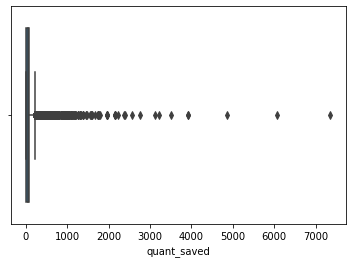

In [13]:
#Box Plot
import seaborn as sns

sns.boxplot(data=df, x=df["quant_saved"])

Here, we can see that the majority of the data is represented by a thick, long black line. We then have a thin long black line and finally we have a horizontal line, which is the rest of the data.

\
Here, the thin black vertical line is the line that seperates the data we should use to do our analysis. Let's remove the outliers first.

In [14]:
#iqr(inter quartile range)
#iqr=q3-q1
#outliers are the data point which are  (above q3 and below q1)
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
iqr = q3-q1

print(f"Q1 - {q1}")
print(f"Q3 - {q3}")
print(f"IQR - {iqr}")

lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr

print(f"Lower Whisker - {lower_whisker}")
print(f"Upper Whisker - {upper_whisker}")

#Creating a new DataFrame
new_df = df[df["quant_saved"] < upper_whisker]
#new_df is the dataset without outliers

Q1 - 2.2840000000000003
Q3 - 86.514
IQR - 84.22999999999999
Lower Whisker - -124.06099999999998
Upper Whisker - 212.85899999999998


In [17]:
#Mean, median and mode of savings
all_savings = new_df["quant_saved"].tolist()

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")
print(f"Standard deviation in savings - {statistics.stdev(all_savings)}")

fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

Mean of savings - 46.200519389818794
Median of savings - 36.0475
Mode of savings - 0.0
Standard deviation in savings - 50.866871917288634


In [21]:
#Collecting 1000 samples of 100 data points each, saving their averages in a list
import random

sampling_mean_list = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling = statistics.mean(sampling_mean_list)

fig = ff.create_distplot([sampling_mean_list], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

In [22]:
print(f"Standard deviation of the sampling data - {statistics.stdev(sampling_mean_list)}")

Standard deviation of the sampling data - 4.912994078356215


In [24]:
print(f"Mean of Population - {statistics.mean(all_savings)}")
print(f"stdev of Population - {statistics.stdev(all_savings)}")

print(f"Mean of Sampling Distribution - {mean_sampling}")
#stdev of sampling=stdev of population/sqrt(sampling size)

Mean of Population - 46.200519389818794
stdev of Population - 50.866871917288634
Mean of Sampling Distribution - 46.01216494728112


In [25]:
#temp_df will have the rows where age is not 0
temp_df = new_df[new_df.age != 0]

age = temp_df["age"].tolist()
savings = temp_df["quant_saved"].tolist()

correlation = np.corrcoef(age, savings)
print(f"Correlation between the age of the person and their savings is - {correlation[0,1]}")

Correlation between the age of the person and their savings is - 0.08561544120342093


Conclusion

Given all the analysis that we have done, we saw that there was not much difference between the people who got reminded about saving v/s people who were not reminded of saving.


With our Z-Score test, we confirmed that there is not much difference. The Z-Score is around 0.8; it is only when the Z-Score is greater than 2 that we consider the change as significant. Although people who were reminded had a little increase in savings, there's still no significant impact.


We also saw that there was no direct correlation between the age of the people and the money that they save.